In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # also helps in plotting
import random 
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")  # to ignore the warnings which come when we use older syntax as libraries keep on updating

In [5]:
train_df=pd.read_csv("/kaggle/input/playground-series-s4e11/train.csv")

In [6]:
train_df.head()

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours        Healthy   
1                 NaN               3.0  Less than 5 hours      Unhealthy   
2                 2.0               NaN          5-6 hours        Healthy   
3                 NaN               1.0  Less than 5 hours       Moderate   
4                 NaN               1.0          5-6 hours      Unhealthy   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   Financial Stress Family History of Mental Illness  Depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

In [7]:
print("The number of Features in  train dataset :",train_df.shape[1])
print("The number of Rows in Train dataset :",train_df.shape[0])

The number of Features in  train dataset : 20
The number of Rows in Train dataset : 140700


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [9]:
train_df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [10]:
# Now since some data is missing, we will fill it using these strategies

# Use mean values for numeric columns
train_df.fillna(train_df.mean(numeric_only=True), inplace=True)

# Fill categorical columns with mode
for col in train_df.select_dtypes(include=['object', 'category']).columns:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

In [11]:
train_df.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

# Now we will split numerical and categorial features

In [12]:
train_df = train_df.drop(columns=['id','Name','City'])

In [13]:
# select numerical columns
numeric_features = train_df.select_dtypes(include=['number']).columns

# Select Categorical Columns
categorical_features = train_df.select_dtypes(include=['object']).columns

In [14]:
train_df.describe()

Age  Academic Pressure  Work Pressure           CGPA  \
count  140700.000000      140700.000000  140700.000000  140700.000000   
mean       40.388621           3.142273       2.998998       7.658636   
std        12.384099           0.614679       1.258598       0.652098   
min        18.000000           1.000000       1.000000       5.030000   
25%        29.000000           3.142273       2.000000       7.658636   
50%        42.000000           3.142273       2.998998       7.658636   
75%        51.000000           3.142273       4.000000       7.658636   
max        60.000000           5.000000       5.000000      10.000000   

       Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count       140700.000000     140700.000000     140700.000000   
mean             2.944940          2.974404          6.252679   
std              0.605658          1.267871          3.853615   
min              1.000000          1.000000          0.000000   
25%              2.944940          2.000000          3.000000   
50%              2.944940          2.974404          6.000000   
75%              2.944940          4.000000         10.000000   
max              5.000000          5.000000         12.000000   

       Financial Stress     Depression  
count     140700.000000  140700.000000  
mean           2.988983       0.181713  
std            1.413613       0.385609  
min            1.000000       0.000000  
25%            2.000000       0.000000  
50%            3.000000       0.000000  
75%            4.000000       0.000000  
max            5.000000       1.000000

# 1. Univariate Analyisis

# A. Numerical Features

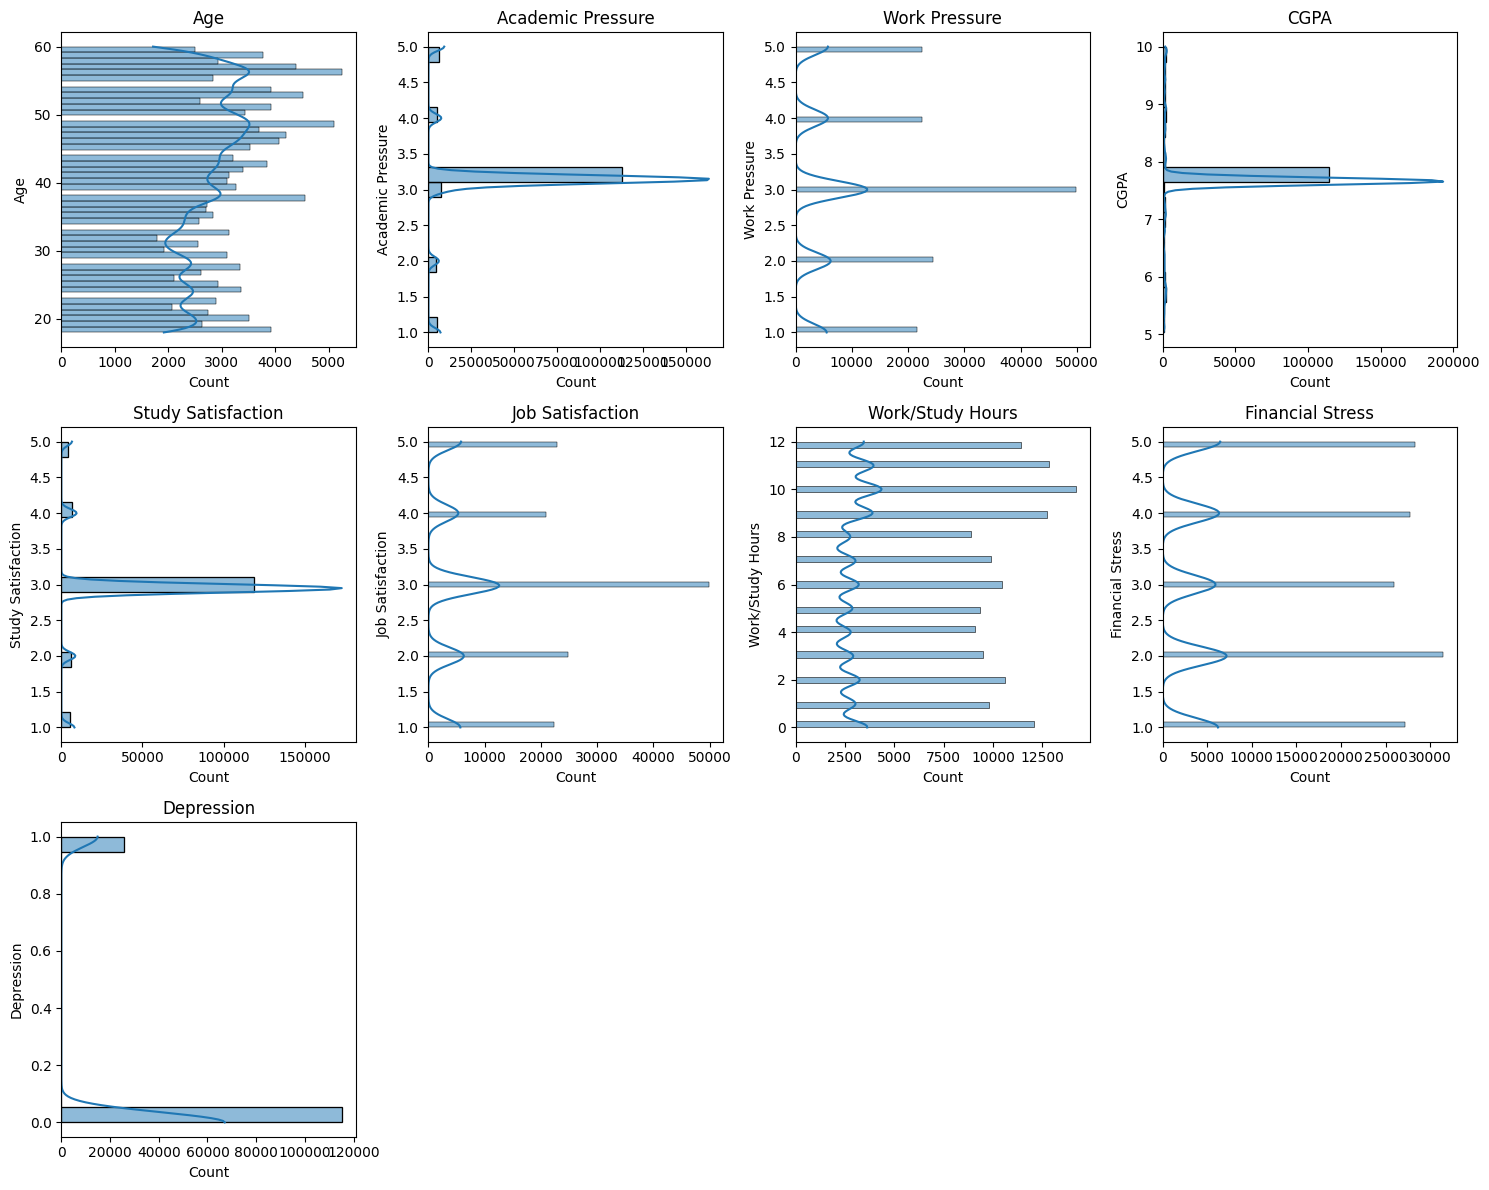

In [15]:
# used to visualize the distribution of numerical data
num_cols = 4  
num_rows = int(np.ceil(len(numeric_features) / num_cols)) 

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each numeric column and plot
for i, col in enumerate(numeric_features):
    sns.histplot(y=train_df[col], ax=axes[i],kde =True)
    axes[i].set_title(col)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# B. Categorial Features

In [16]:
for col in categorical_features:
    print(col, "-->", train_df[col].unique())

Gender --> ['Female' 'Male']
Working Professional or Student --> ['Working Professional' 'Student']
Profession --> ['Chef' 'Teacher' 'Business Analyst' 'Finanancial Analyst' 'Chemist'
 'Electrician' 'Software Engineer' 'Data Scientist' 'Plumber'
 'Marketing Manager' 'Accountant' 'Entrepreneur' 'HR Manager'
 'UX/UI Designer' 'Content Writer' 'Educational Consultant'
 'Civil Engineer' 'Manager' 'Pharmacist' 'Financial Analyst' 'Architect'
 'Mechanical Engineer' 'Customer Support' 'Consultant' 'Judge'
 'Researcher' 'Pilot' 'Graphic Designer' 'Travel Consultant'
 'Digital Marketer' 'Lawyer' 'Research Analyst' 'Sales Executive' 'Doctor'
 'Unemployed' 'Investment Banker' 'Family Consultant' 'B.Com' 'BE'
 'Student' 'Yogesh' 'Dev' 'MBA' 'LLM' 'BCA' 'Academic' 'Profession'
 'FamilyVirar' 'City Manager' 'BBA' 'Medical Doctor'
 'Working Professional' 'MBBS' 'Patna' 'Unveil' 'B.Ed' 'Nagpur' 'Moderate'
 'M.Ed' 'Analyst' 'Pranav' 'Visakhapatnam' 'PhD' 'Yuvraj']
Sleep Duration --> ['More than 8 hours

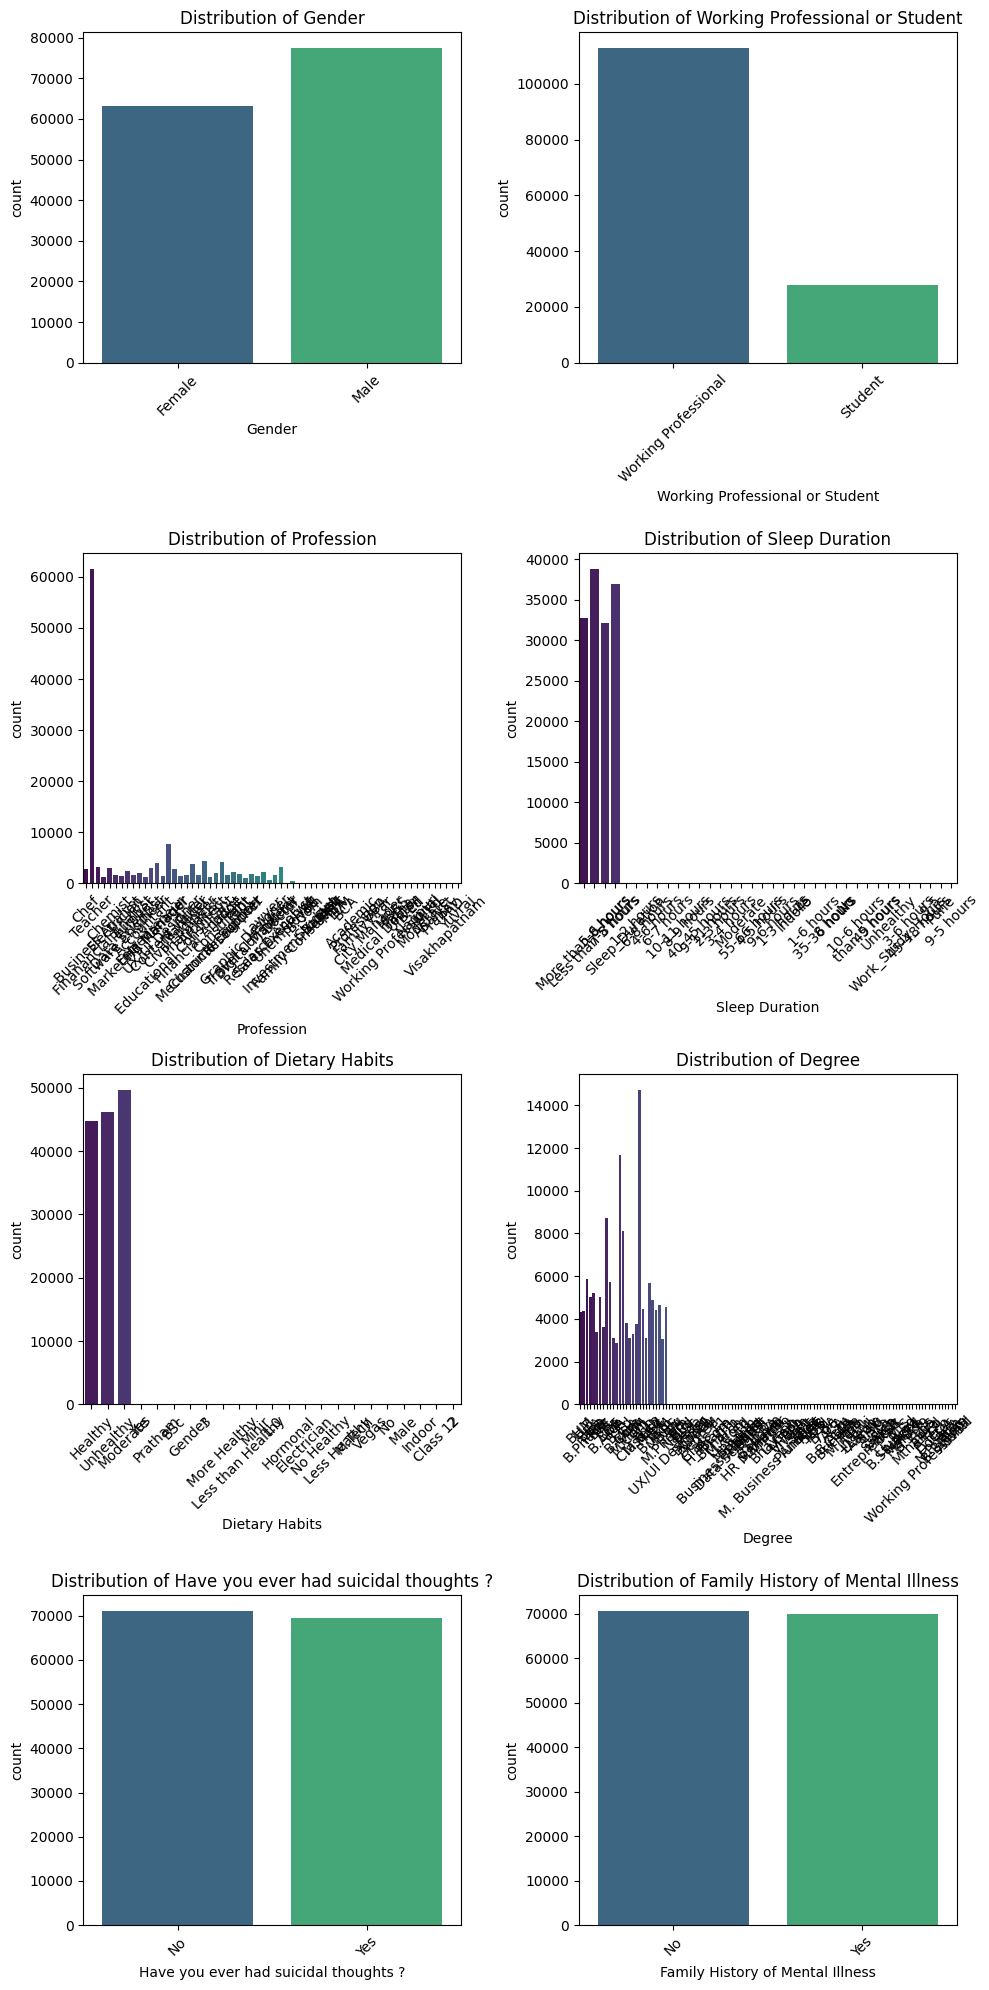

In [17]:
import math
n_features = len(categorical_features)
ncols = 2
nrows = math.ceil(n_features / ncols)  

# Plot the countplot for each categorical feature
plt.figure(figsize=(10, nrows * 5))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(nrows, ncols, i)  # Create subplots with dynamic grid size
    sns.countplot(x=train_df[col], palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# 2. BIVARIATE ANALYSIS


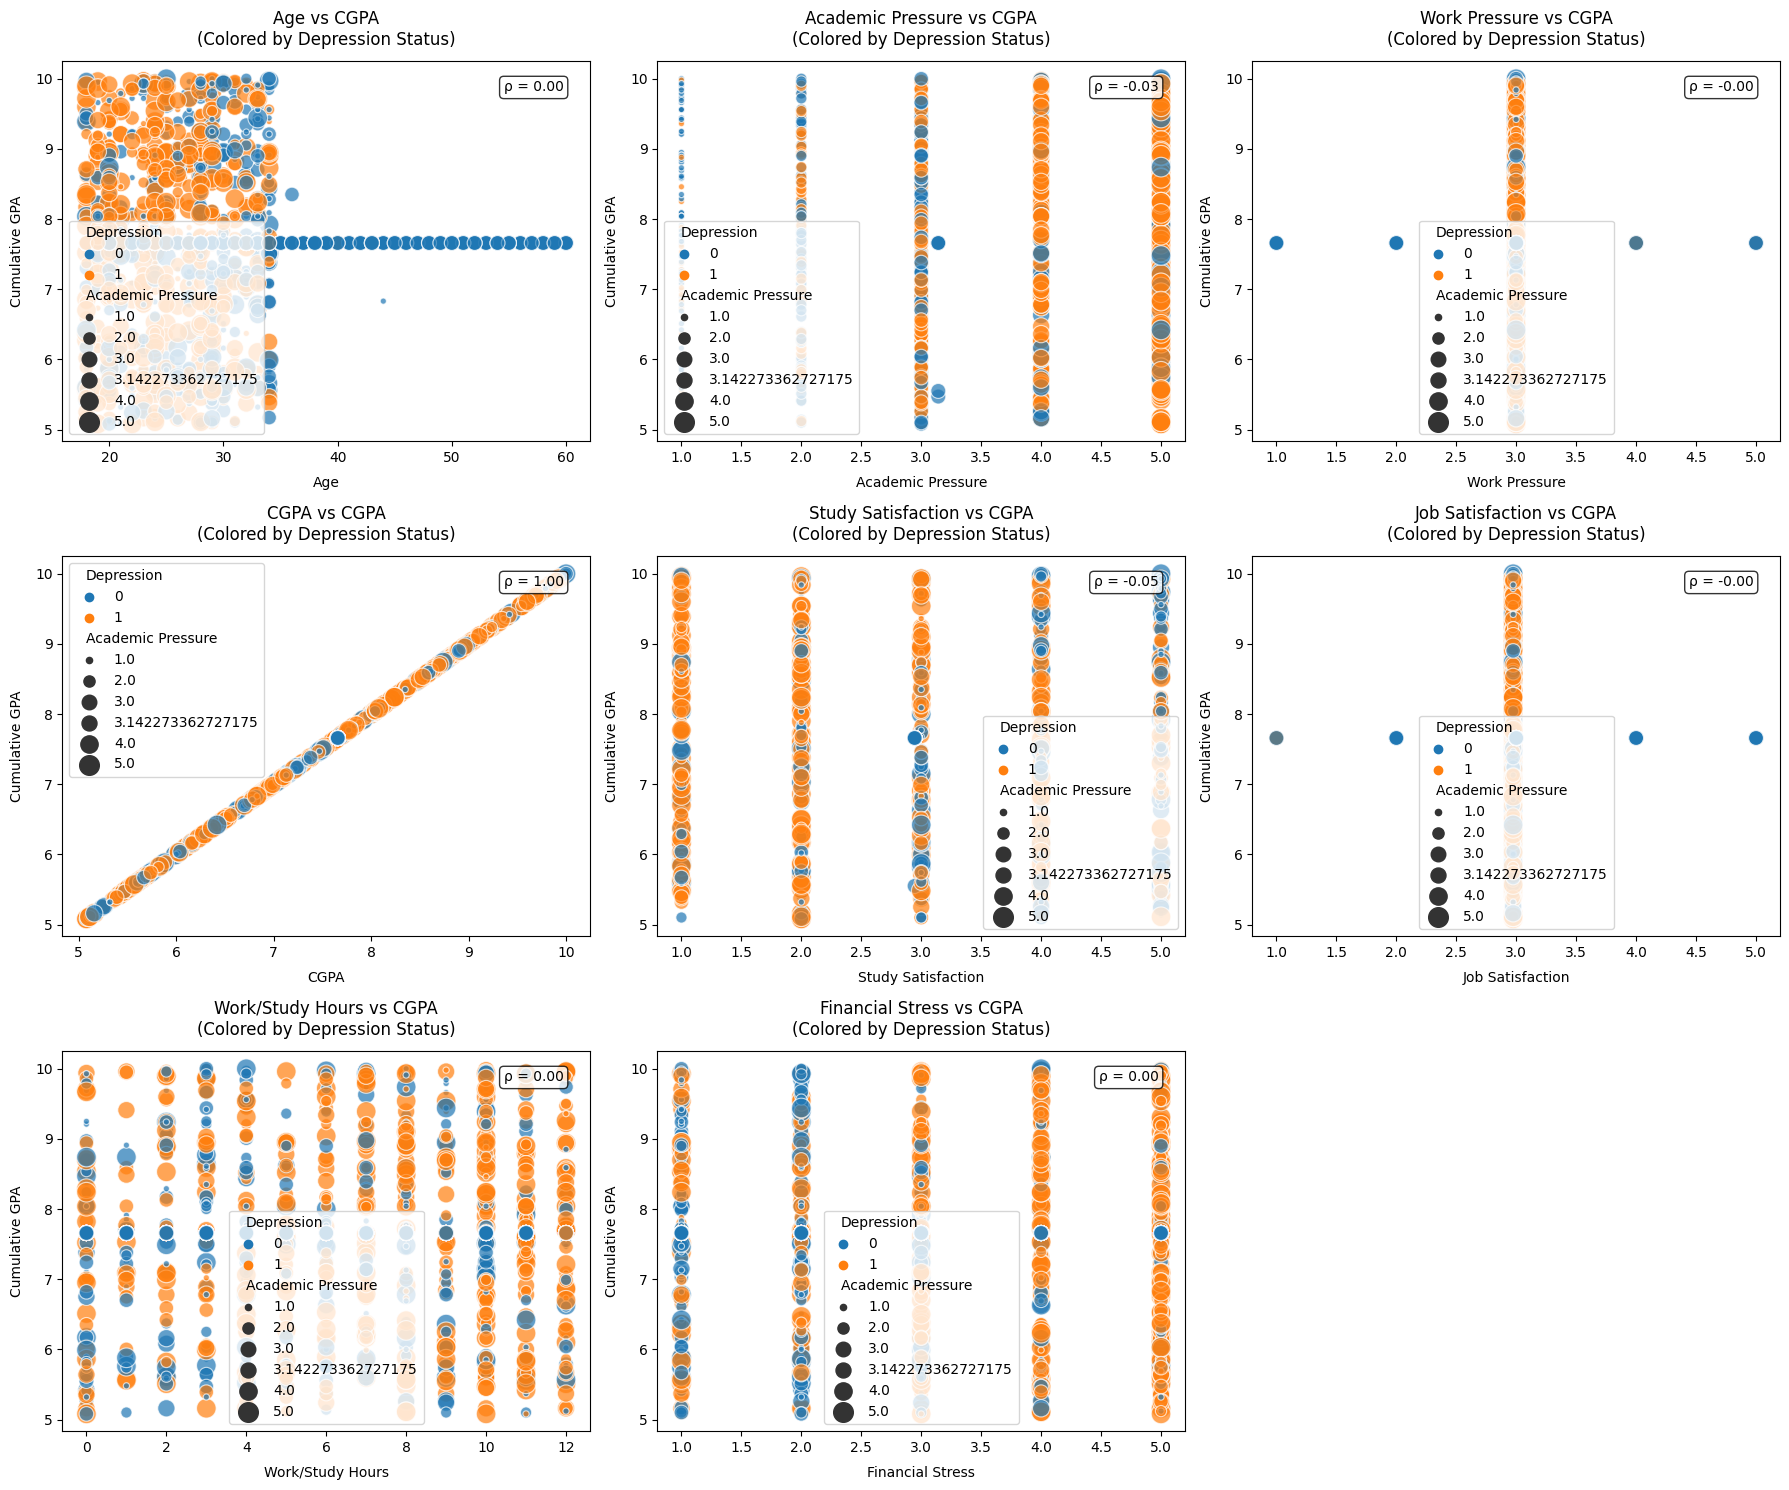

In [21]:
# ************* Bivariate Analysis with Scatterplots ***************
# Used to examine relationships between numeric features and key variables

# Select numeric features (excluding ID and target)
numeric_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                   'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
                   'Financial Stress']

num_cols = 3  
num_rows = int(np.ceil(len(numeric_features) / num_cols))

# Create subplot grid with proper spacing
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows*5))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

# Generate enhanced scatterplots
for i, col in enumerate(numeric_features):
    sns.scatterplot(
        data=train_df.sample(5000, random_state=42),  # Subsample for performance
        x=col,
        y='CGPA',  # Core academic performance metric
        hue='Depression',
        palette={0:'#1f77b4', 1:'#ff7f0e'},  # Consistent color encoding
        size='Academic Pressure',
        sizes=(20, 200),
        alpha=0.7,
        ax=axes[i]
    )
    axes[i].set_title(f'{col} vs CGPA\n(Colored by Depression Status)', pad=12)
    axes[i].set_xlabel(col, labelpad=8)
    axes[i].set_ylabel('Cumulative GPA', labelpad=8)
    
    # Add correlation annotation
    corr = train_df[[col, 'CGPA']].corr().iloc[0,1]
    axes[i].annotate(f'ρ = {corr:.2f}', xy=(0.95, 0.95), 
                    xycoords='axes fraction', ha='right', va='top',
                    bbox=dict(boxstyle='round', alpha=0.8, facecolor='white'))

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Categorical vs Numerical

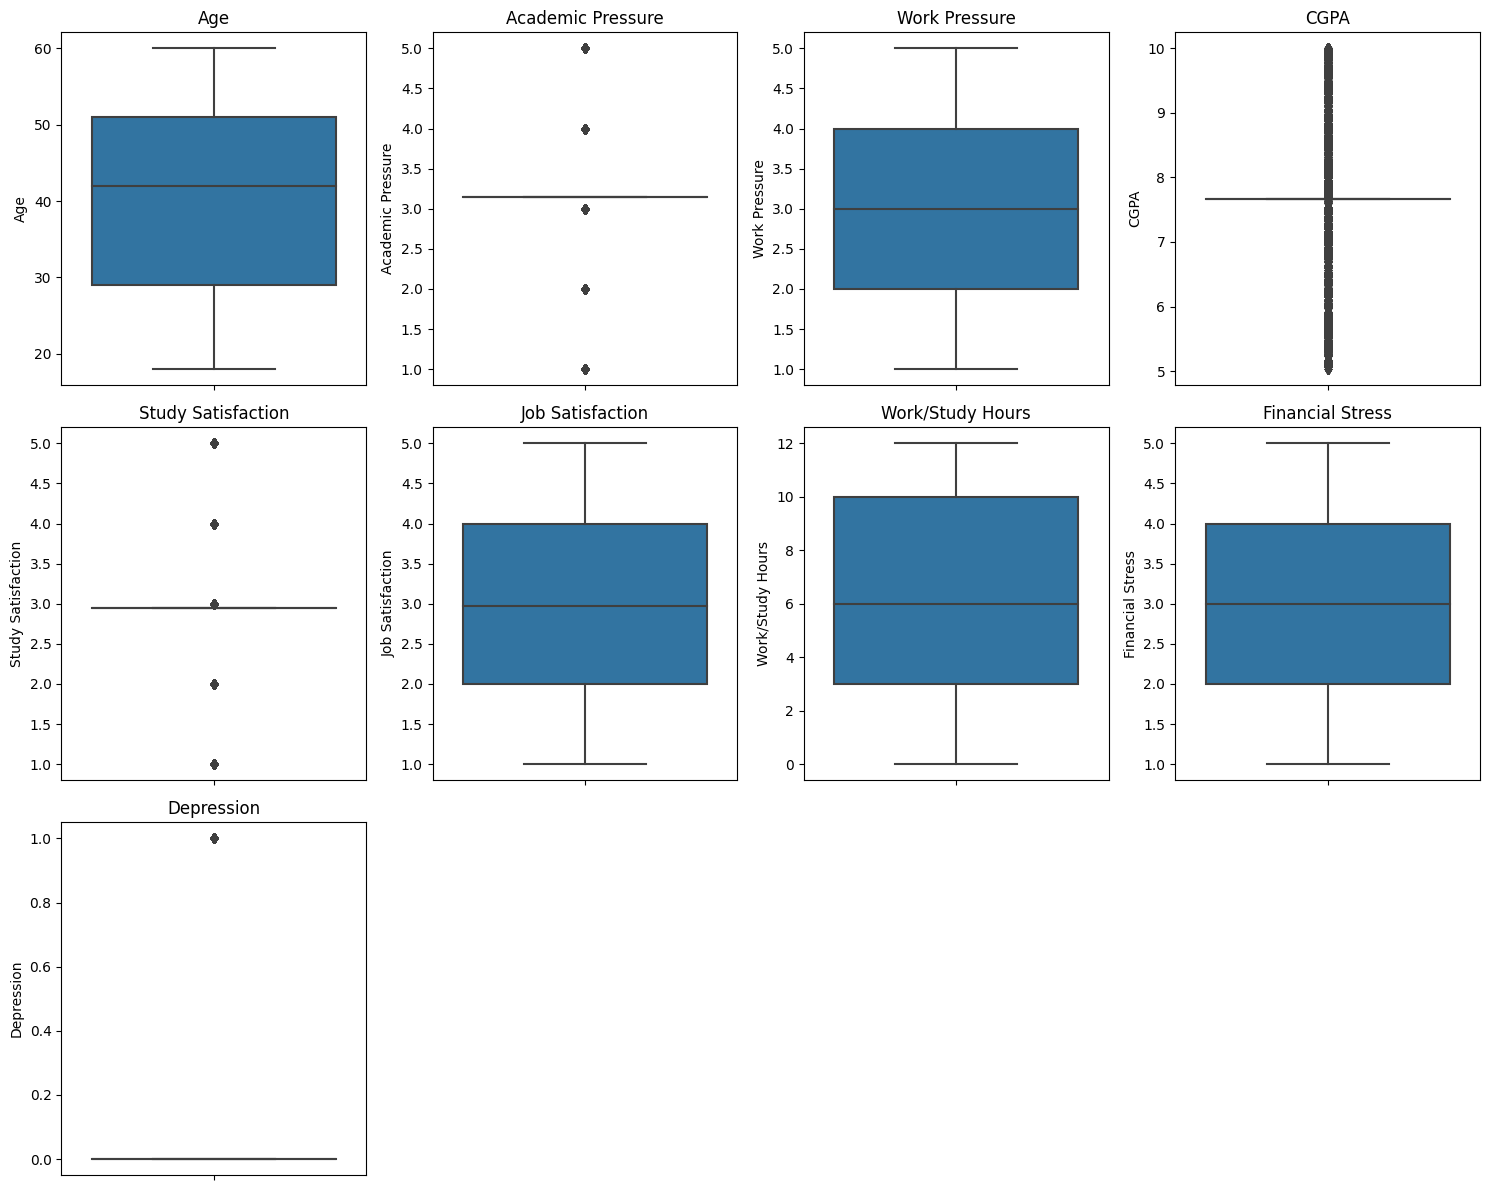

In [19]:
# *************we are plotting box plot to detect outliers***************
# used to visualize the distribution of numerical data
num_cols = 4  
num_rows = int(np.ceil(len(numeric_features) / num_cols))  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each numeric column and plot
for i, col in enumerate(numeric_features):
    sns.boxplot(y=train_df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 3. MULTIVARIATE ANALYSIS

<Figure size 2500x2000 with 0 Axes>

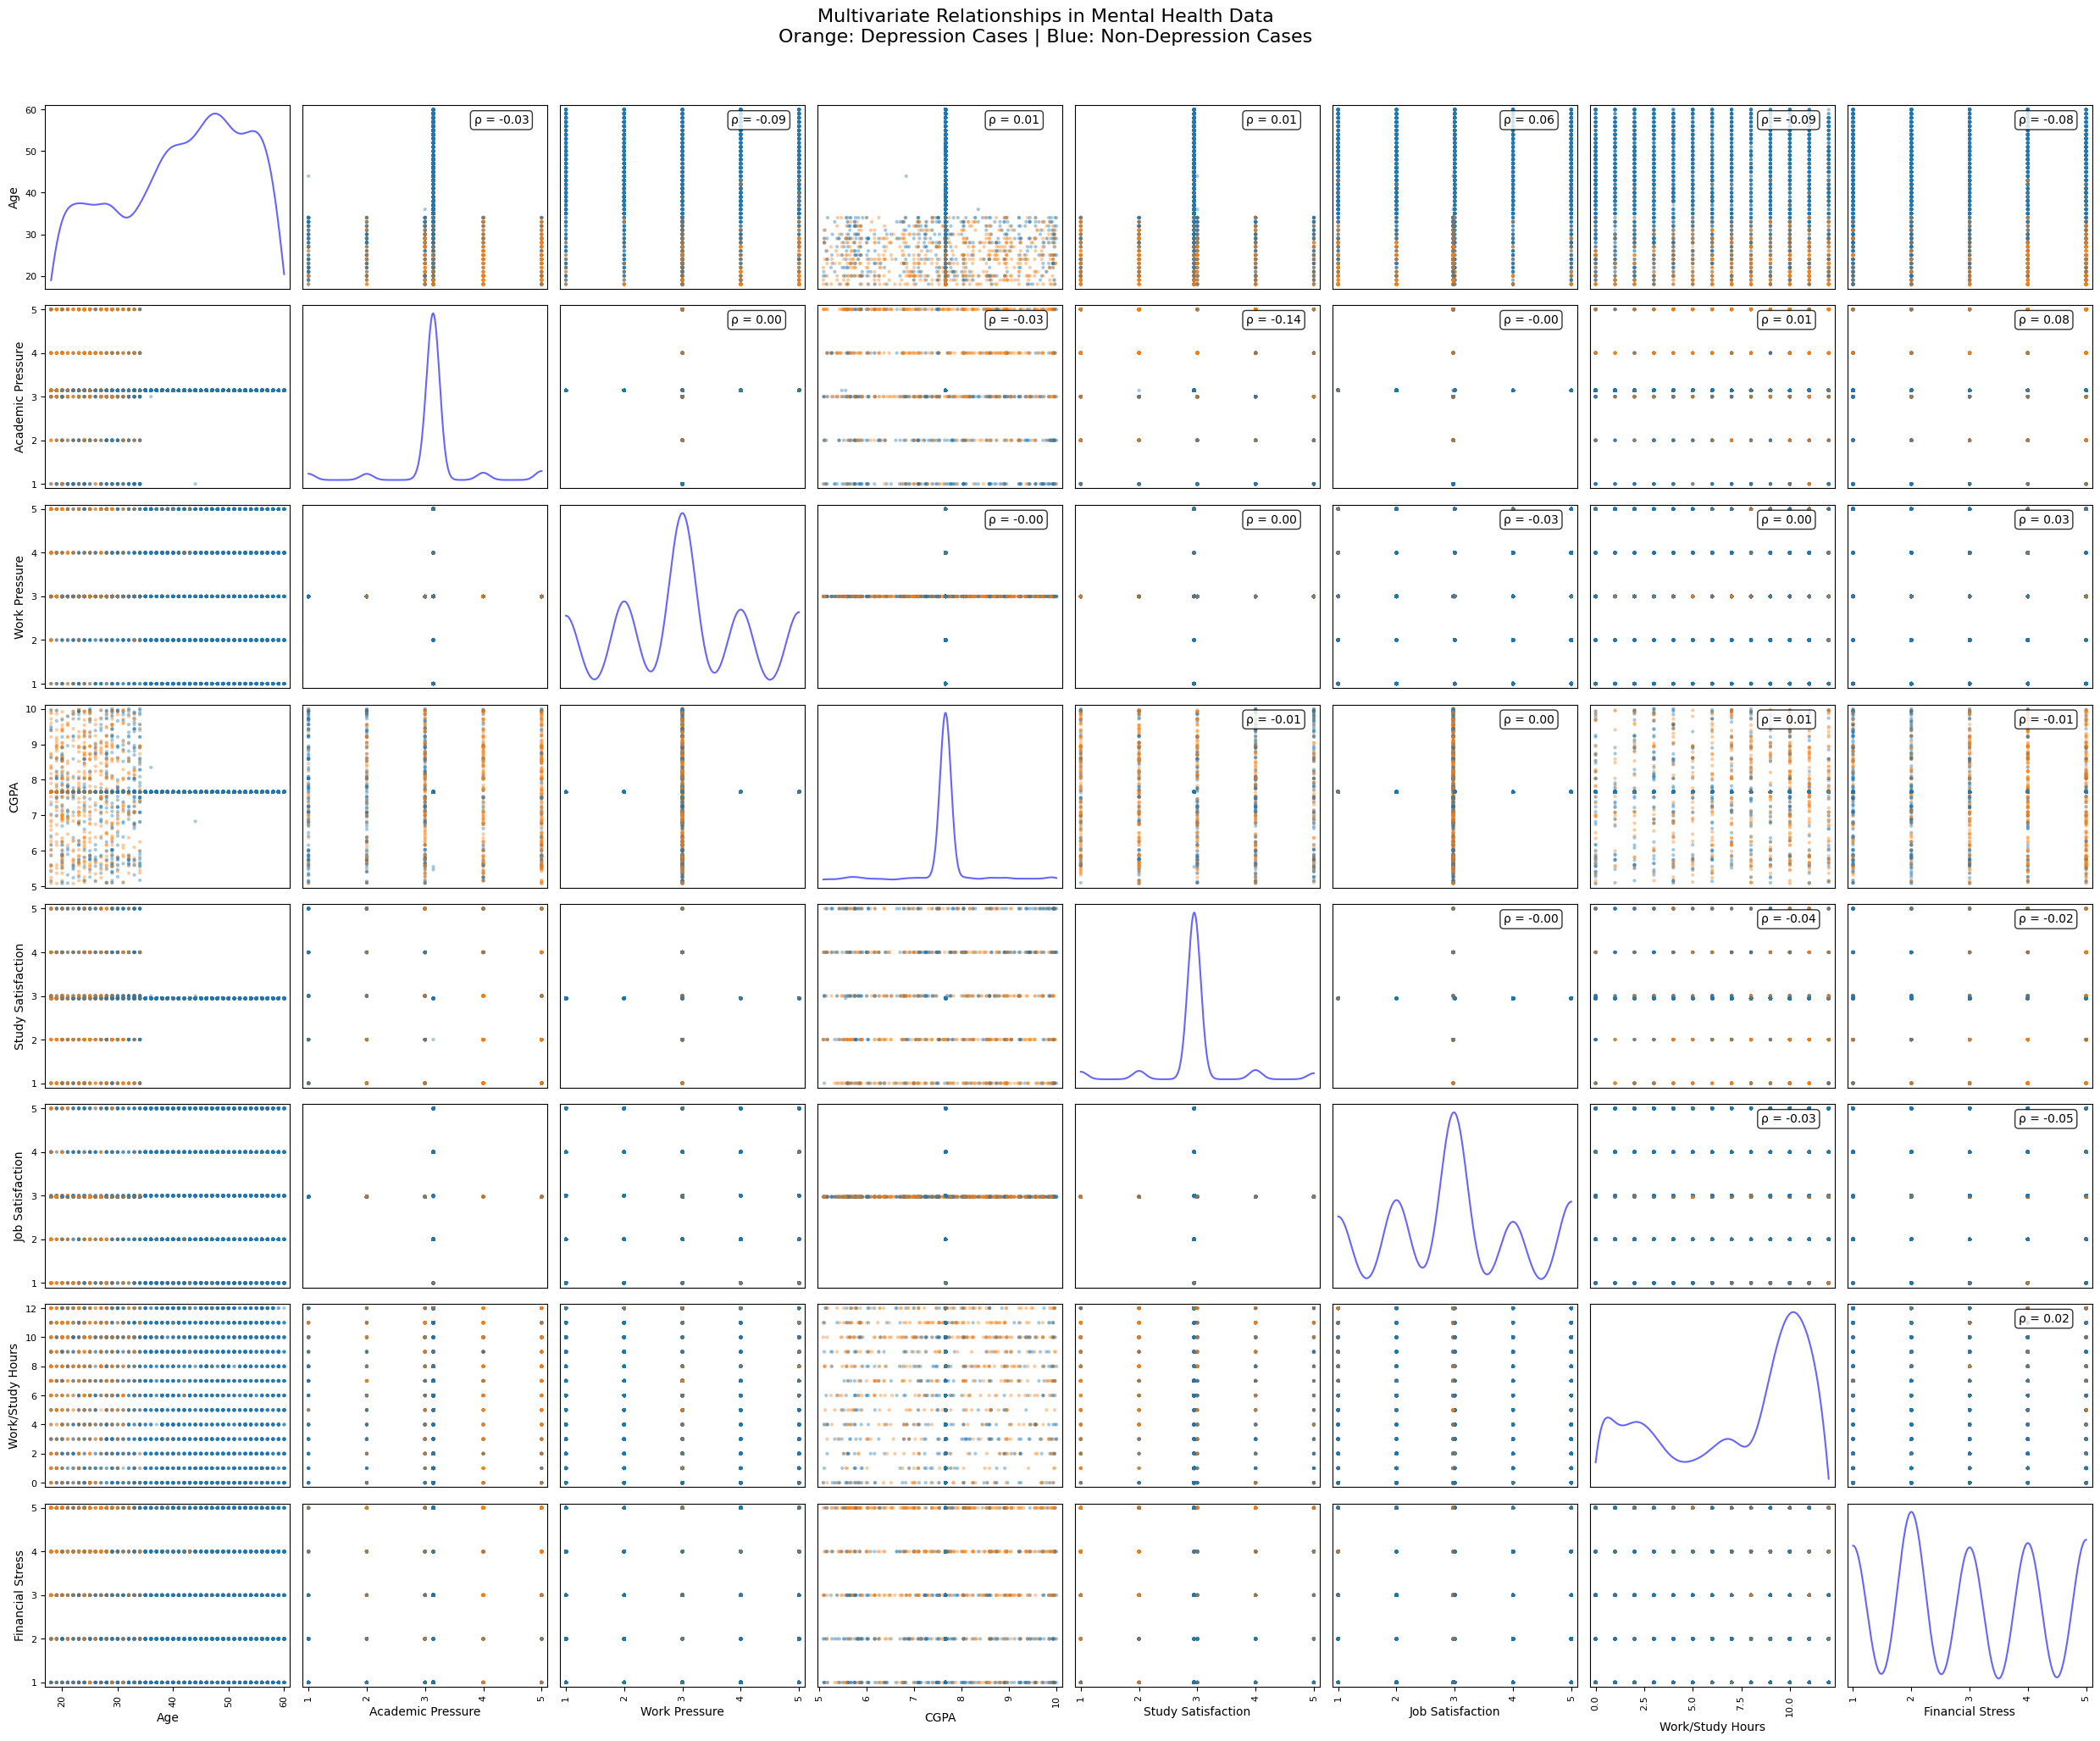

In [24]:
# Select relevant numerical features from your mental health dataset
numerical_vars = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
                 'Financial Stress', 'Depression']

# Clean data and subsample for visualization clarity
plot_data = train_df[numerical_vars].dropna().sample(5000, random_state=42)

# Create enhanced scatter matrix with target highlighting
plt.figure(figsize=(25, 20))
axes = pd.plotting.scatter_matrix(
    plot_data.drop('Depression', axis=1),
    diagonal='kde',
    alpha=0.4,
    figsize=(25, 20),
    density_kwds={'color': 'blue', 'alpha':0.6},
    marker='.',
    color=plot_data['Depression'].map({0:'#1f77b4', 1:'#ff7f0e'})
)

# Add correlation values to upper triangle
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    ax = axes[i, j]
    x_var = numerical_vars[j]
    y_var = numerical_vars[i]
    corr = plot_data[[x_var, y_var]].corr().iloc[0,1]
    ax.annotate(f"ρ = {corr:.2f}", xy=(0.7, 0.9), 
                xycoords='axes fraction', fontsize=10,
                bbox=dict(boxstyle='round', alpha=0.8, facecolor='white'))

plt.suptitle('Multivariate Relationships in Mental Health Data\n' +
            'Orange: Depression Cases | Blue: Non-Depression Cases',
            y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


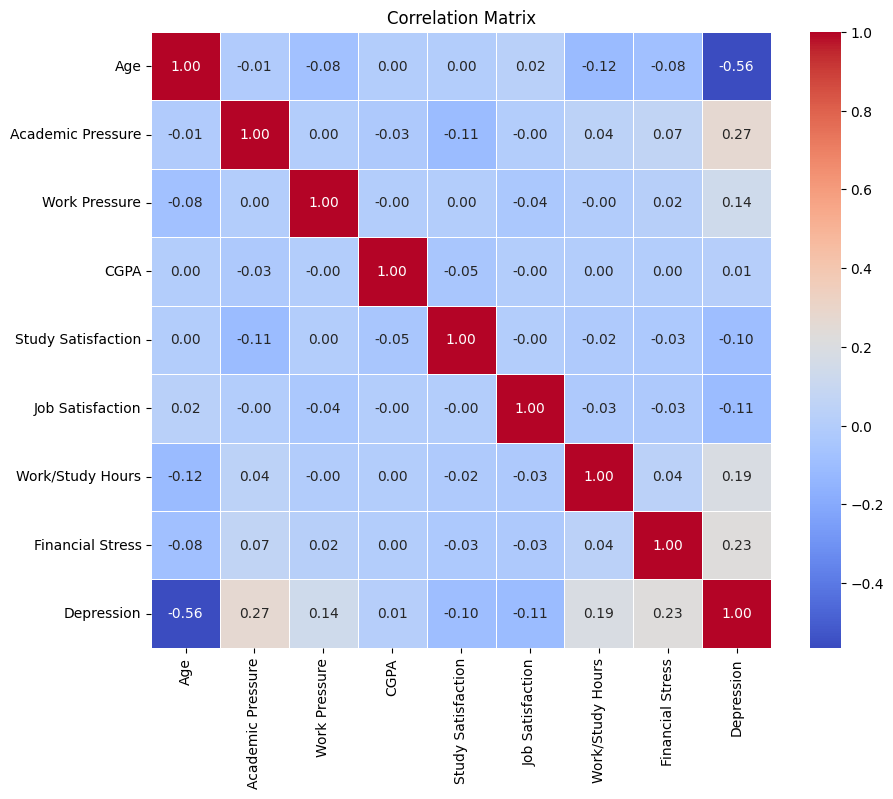

In [20]:
numeric_columns = train_df.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

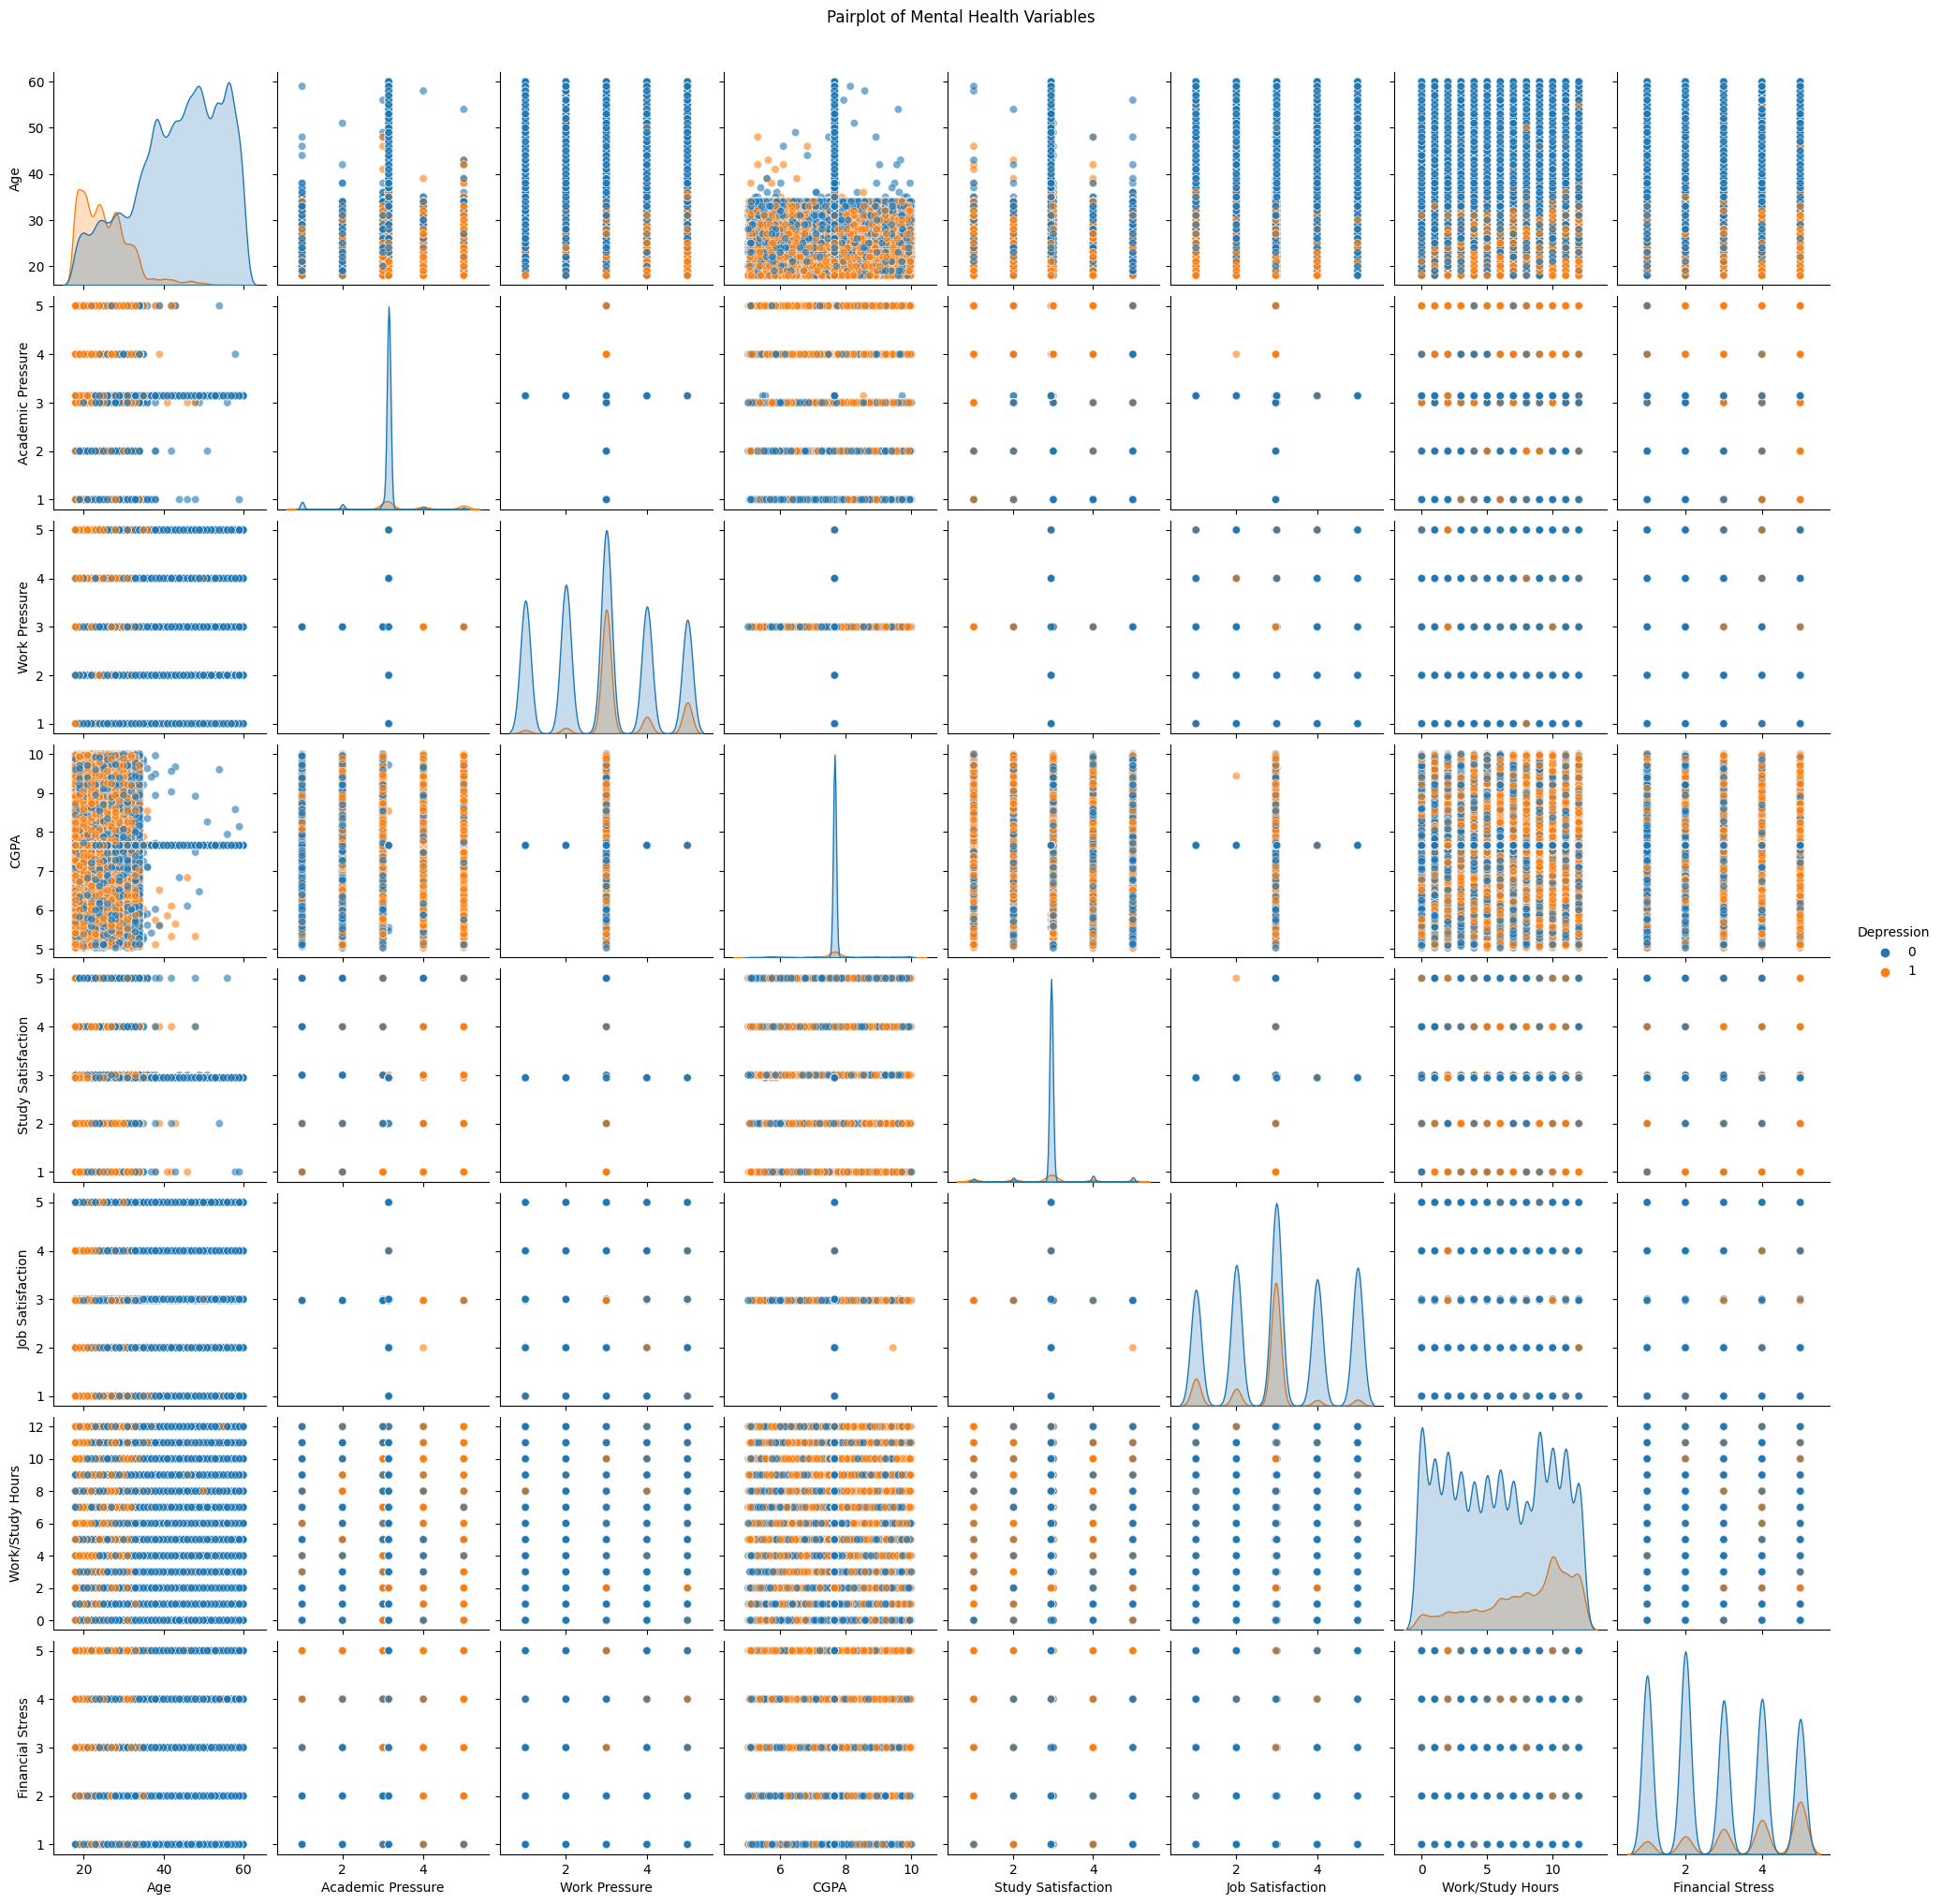

In [25]:
# Select relevant numerical variables including the target variable
numerical_vars = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                  'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 
                  'Financial Stress', 'Depression']

# Create the pairplot
sns.pairplot(train_df[numerical_vars], 
             hue='Depression',  
             height=2.5,  
             plot_kws={'alpha': 0.6}) 

plt.suptitle('Pairplot of Mental Health Variables', y=1.02)
plt.show()


# 